In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('adult.data.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### How many people of each race are represented in this dataset? 

In [4]:
race_counts= df['race'].value_counts()
race_counts

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

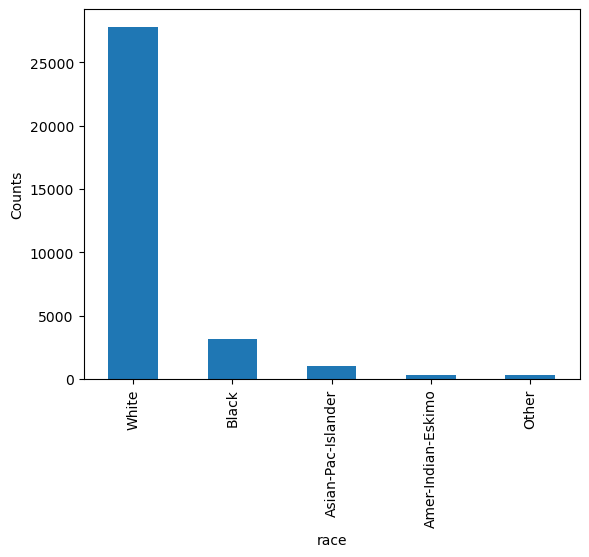

In [5]:
race_counts.plot(kind='bar')
plt.ylabel('Counts')

### What is the average age of men?

In [6]:
round(df[df['sex']=='Male']['age'].mean(),1)

39.4

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

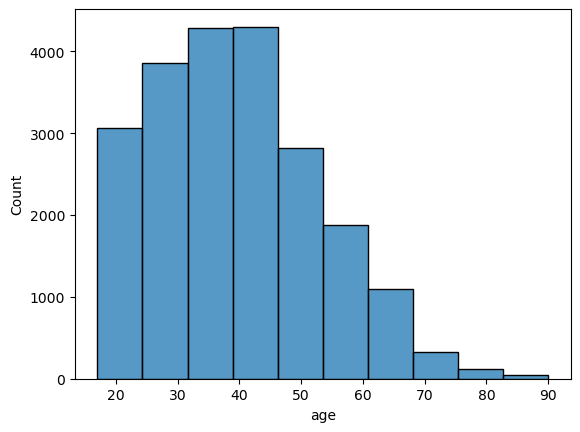

In [7]:
men_data = df[df['sex']=='Male']

sns.histplot(men_data['age'],bins=10)

### Education

#### What is the percentage of people who have a Bachelor's degree?

In [8]:
round(df[df['education'] == 'Bachelors'].shape[0]/df.shape[0] * 100, 1)

16.4

<Axes: ylabel='count'>

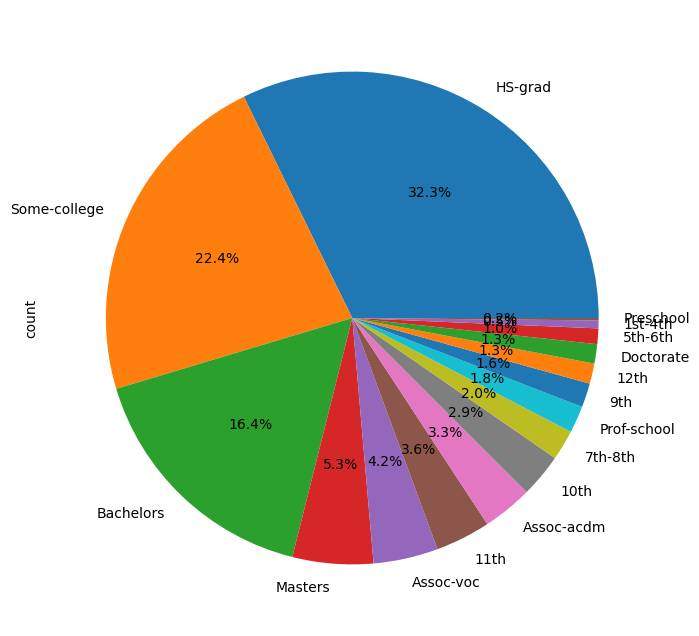

In [9]:
df['education'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))

#### What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [10]:
advanced = df[df["education"].isin(["Bachelors", "Masters", "Doctorate"])]
percentage = round(advanced["salary"].value_counts(normalize=True).get(">50K", 0) * 100,1)
percentage

46.5

 #### What percentage of people without advanced education make more than 50K?

In [11]:
notadvanced = df[~df["education"].isin(["Bachelors", "Masters", "Doctorate"])]
percentage = round(notadvanced['salary'].value_counts(normalize=True).get('>50k',0)*100,1)
percentage

0

 ### What is the minimum number of hours a person works per week (hours-per-week feature)?

In [12]:
df['hours-per-week'].min()

1

 ### What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [13]:
df[df['hours-per-week'] == df['hours-per-week'].min()]['salary'].value_counts(normalize=True).get('>50K', 0) * 100


10.0

<Axes: xlabel='salary', ylabel='hours-per-week'>

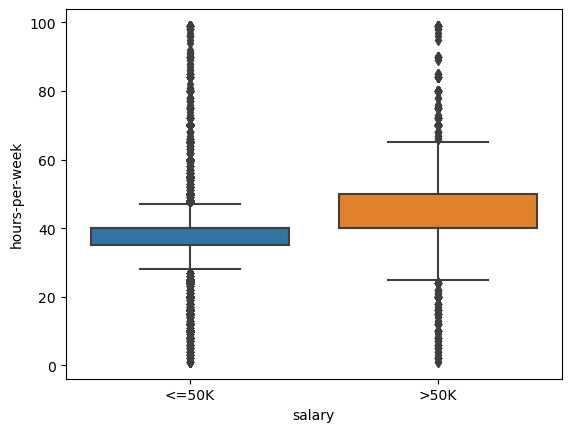

In [14]:
sns.boxplot(x='salary', y='hours-per-week', data=df)

### What country has the highest percentage of people that earn >50K?

In [15]:
country_earning = df[df['salary'] == '>50K']['native-country'].value_counts()
country_total = df['native-country'].value_counts()
country_percentage = (country_earning/country_total)*100

top_country = country_percentage.idxmax()
top_percentage = country_percentage.max()
print(f"The country with the highest percentage of >50K earners is {top_country} with {top_percentage:.2f}%.")

The country with the highest percentage of >50K earners is Iran with 41.86%.


<Axes: ylabel='native-country'>

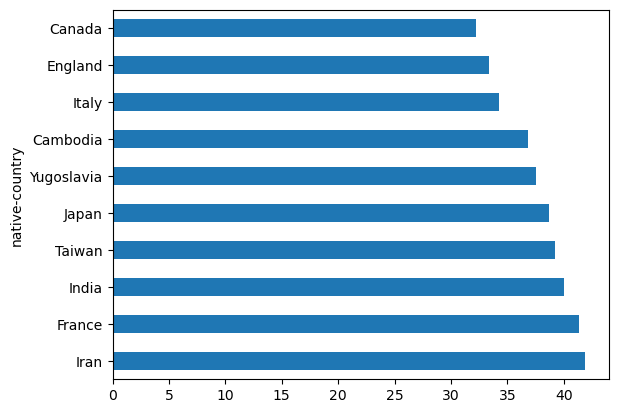

In [16]:
high_earner_country = country_percentage.sort_values(ascending = False)
high_earner_country.head(10).plot(kind='barh')